<a href="https://colab.research.google.com/github/fjalvarado/CADi_optimization/blob/main/simple_IP_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pwd

/content/drive/My Drive/Colab Notebooks/CADi


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CADi")
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/CADi


In [5]:
# pip install for a limited license of the Gurobi callable library
%pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 48.4 MB/s eta 0:00:00


# Simple Integer Linear Programming Problem

$$
\text{Max}\quad x+y+2z
$$
subject to
$$
x+2y+3z<=4\\
x+y>=1
$$


In [6]:
import gurobipy as gp
from gurobipy import GRB

In [7]:
# Create the model m
m = gp.Model("example")

Restricted license - for non-production use only - expires 2024-10-28


In [8]:
# Create decision variables
x = m.addVar(vtype=GRB.BINARY, name="x")
y = m.addVar(vtype=GRB.BINARY, name="y")
z = m.addVar(vtype=GRB.BINARY, name="z")

In [9]:
# Objective function
m.setObjective(x+y+2*z,GRB.MAXIMIZE)

In [10]:
# Constraints
c1 = m.addConstr(x+2*y+3*z <= 4, name="c1")
c2 = m.addConstr(x+y >= 1, name="c2")

In [11]:
# save model for inspection
m.write('example.lp')

In [12]:
# run optimization engine
m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


In [15]:
# display optimal solution
for v in m.getVars():
    print(v.varName,v.x)

print(f"\nOptimal objective function value: {m.objVal:,}")

x 1.0
y 0.0
z 1.0

Optimal objective function value: 3.0


## The Furniture Problem

In [21]:
furn = gp.Model("furniture")
x1 = furn.addVar(name="chairs")
x2 = furn.addVar(name="tables")
furn.setObjective(45*x1+80*x2,GRB.MAXIMIZE)
mahogany = furn.addConstr(5*x1+20*x2 <= 400, name="mahogany")
labor = furn.addConstr(10*x1+15*x2 <= 450, name="labor")
furn.write('furniture.lp')

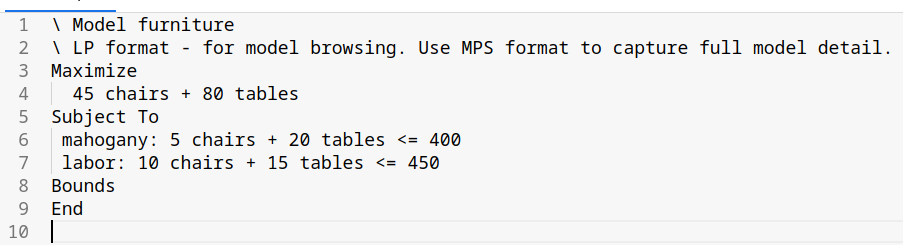

In [25]:
for v in furn.getVars():
    print(v.varName,dir(v))

#print(f"\nOptimal total revenue: ${furn.objVal:,}")

chairs ['BarX', 'BranchPriority', 'IISLB', 'IISLBForce', 'IISUB', 'IISUBForce', 'LB', 'Obj', 'ObjN', 'PStart', 'PWLObjCvx', 'Partition', 'PoolIgnore', 'PreFixVal', 'RC', 'SALBLow', 'SALBUp', 'SAObjLow', 'SAObjUp', 'SAUBLow', 'SAUBUp', 'ScenNLB', 'ScenNObj', 'ScenNUB', 'ScenNX', 'Start', 'UB', 'UnbdRay', 'VBasis', 'VDualNorm', 'VTag', 'VType', 'VarHintPri', 'VarHintVal', 'VarName', 'VarPreStat', 'X', 'Xn', '__add__', '__cindex__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__numcols__', '__pow__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_cmodel', '_colno', '_safename', '_typeenum', '_t